In [1]:
import pandas as pd
root = './experiment/'
file_list = ['mean_curve_gcam_food101.csv',
             'mean_curve_rollout_food101.csv',
             'mean_curve_lrp_food101.csv',
             'mean_curve_att_food101.csv',
             'mean_curve_promptcam_food101.csv',
             'mean_curve_gwaa_food101.csv']
pd.read_csv(root+file_list[0])

,removed_pixels_percentage,deletion_confidence,deletion_auc,insertion_confidence,insertion_auc
0,0.0,0.765931,0.285595,0.009995,0.540938
1,1.0,0.723571,0.285595,0.015669,0.540938
2,2.0,0.701847,0.285595,0.023013,0.540938
3,3.0,0.683884,0.285595,0.033419,0.540938
4,4.0,0.668694,0.285595,0.044058,0.540938
...,...,...,...,...,...
96,96.0,0.018293,0.285595,0.778634,0.540938
97,97.0,0.015683,0.285595,0.777088,0.540938
98,98.0,0.013424,0.285595,0.774967,0.540938
99,99.0,0.011832,0.285595,0.772083,0.540938


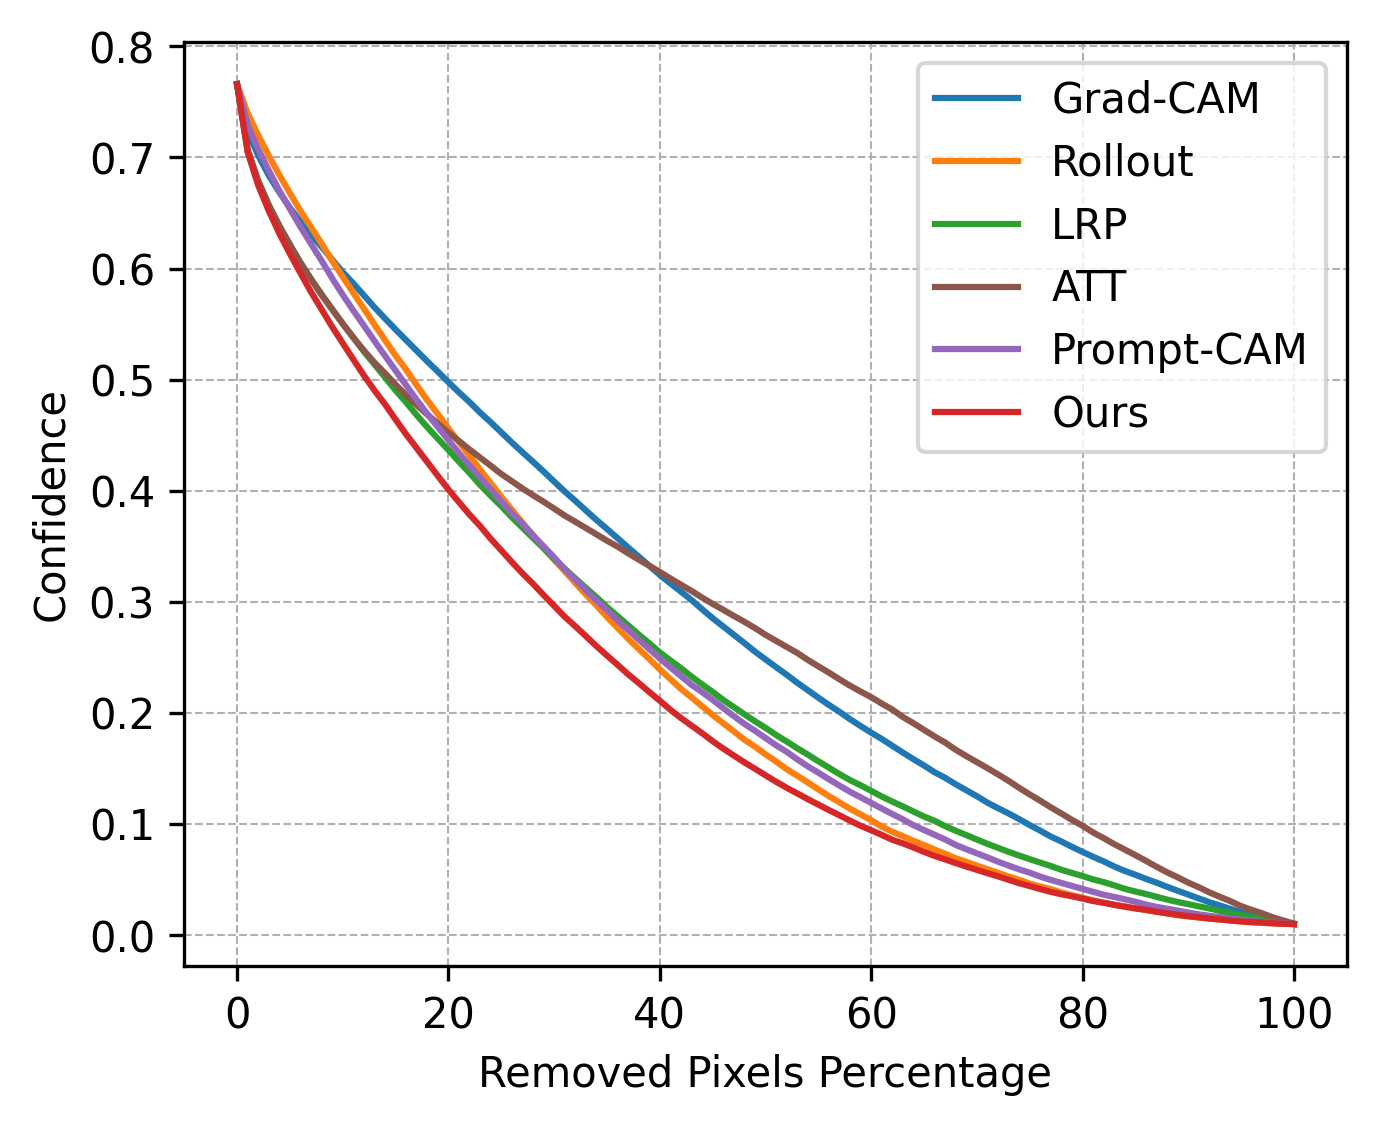

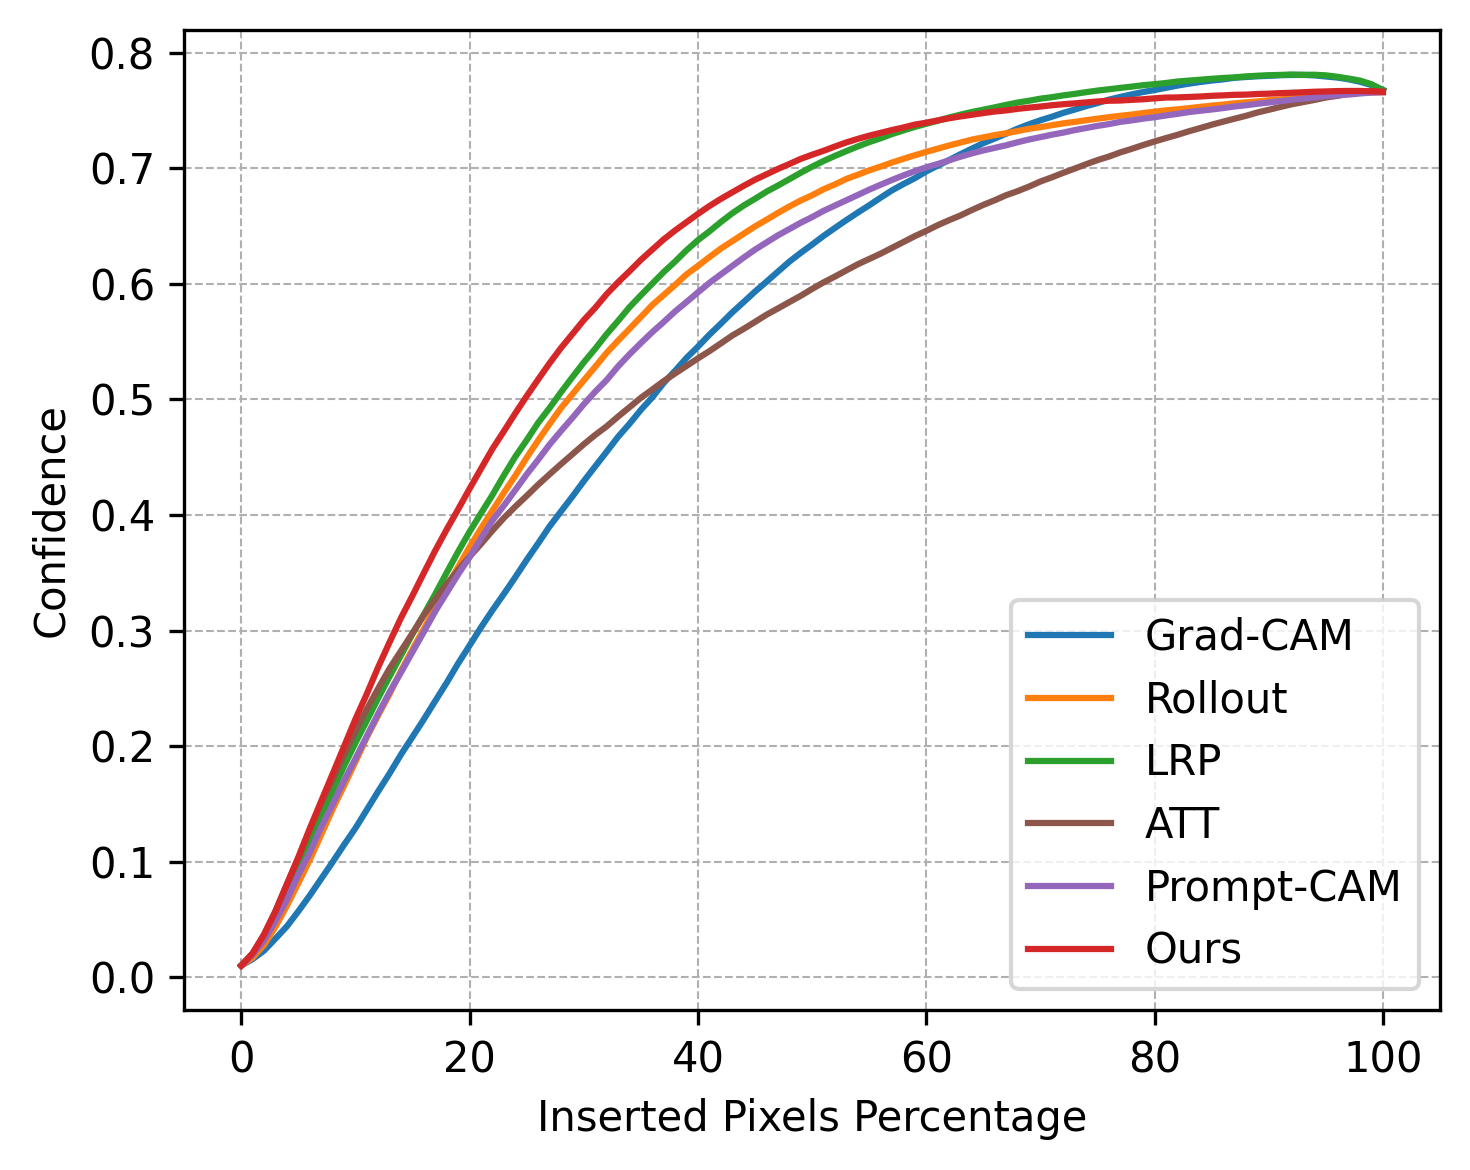

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4),dpi=100)
def plot_curves(ax, file_list, col):
    method = ['Grad-CAM','Rollout','LRP','ATT','Prompt-CAM','Ours']
    
    x_axis = np.linspace(0.0, 1.0, 101) * 100
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#8c564b', '#9467bd', '#d62728']
    
    for i, file in enumerate(file_list):
        df = pd.read_csv(root+file)
        ax.plot(x_axis, df[col],
                color=colors[i % len(colors)],
                linewidth=1.5,
                label=f'{method[i]}')
    
    ax.set_ylabel('Confidence', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
# plot_curves(ax1, file_list, 'deletion_confidence')
# plot_curves(ax2, file_list, 'insertion_confidence')
# plt.tight_layout()
# plt.savefig('./experiment/mean_curve.png', dpi=300)
# plt.show()

# First：Deletion
# figsize可以改成 (6, 4) 或者你喜欢的单张图比例
fig1, ax1 = plt.subplots(figsize=(5, 4), dpi=300) 
ax1.set_xlabel('Removed Pixels Percentage', fontsize=10)
plot_curves(ax1, file_list, 'deletion_confidence')
#plt.tight_layout()
#fig1.savefig('./experiment/deletion_curve.png', dpi=300) # 单独保存
#plt.show() 

# Second：Insertion
fig2, ax2 = plt.subplots(figsize=(5, 4), dpi=300)
ax2.set_xlabel('Inserted Pixels Percentage', fontsize=10)
plot_curves(ax2, file_list, 'insertion_confidence')
plt.tight_layout()
#fig2.savefig('./experiment/insertion_curve.pdf', dpi=300) # 单独保存
plt.show()